In [1]:
%load_ext autoreload
%autoreload 2

import glob
import sys
sys.path.insert(0, "../")

from motiflets.competitors import *
from motiflets.plotting import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
df_all = pd.DataFrame()

paths = {
    "200GB": "../tests/results/pyattimo_0.7.0_200GB",    
    "20GB": "../tests/results/pyattimo_0.7.0_20GB",
    "8GB": "../tests/results/pyattimo_0.7.0_8GB",
}

for name in paths:
    dir_path = paths[name]
    if os.path.isdir(dir_path):
        print(f"Reading from{dir_path}")
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        dfs = [pd.read_csv(file) for file in csv_files]
        
        for key, df in zip(csv_files, dfs):
            filename = os.path.basename(key)
            end = filename.find("pyattimo")
            df["dataset"] = filename[14:end-4]
            # df["dataset"] = key.split("_")[4]
        
        df_config = pd.concat(dfs, ignore_index=True)
        df_config["version"] = name

        # df_config.info()
        
        df_all = pd.concat([df_all, df_config], ignore_index=True)
    else:
        print("Does not exist")

# display(df_all.head())
#df_all.info()

Reading from../tests/results/pyattimo_0.7.0_200GB
Reading from../tests/results/pyattimo_0.7.0_20GB
Reading from../tests/results/pyattimo_0.7.0_8GB


In [3]:
paths = {
    "scalable_sub": "../tests/results/scalable_sub",    
}

for name in paths:
    dir_path = paths[name]
    if os.path.isdir(dir_path):
        print(f"Reading from{dir_path}")
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        dfs = [pd.read_csv(file) for file in csv_files]
        
        for key, df in zip(csv_files, dfs):
            factor = key.split("_")[-1][:-4]
            if int(factor) != 8:
                filename = os.path.basename(key)
                # df["dataset"] = filename.split("_")[2]
                end = filename.find("scalable")
                df["dataset"] = filename[14:end-4]            
                df["version"] = "subsample " + key.split("_")[-1][:-4]
        
        df_config = pd.concat(dfs, ignore_index=True)
        df_all = pd.concat([df_all, df_config], ignore_index=True)
    else:
        print("Does not exist")

# display(df_all.tail())        

Reading from../tests/results/scalable_sub


In [4]:
"""
paths = {
    "scalable_sub": "../tests/results/pynndescent",    
}

for name in paths:
    dir_path = paths[name]
    if os.path.isdir(dir_path):
        print(f"Reading from{dir_path}")
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        dfs = [pd.read_csv(file) for file in csv_files]
        
        for key, df in zip(csv_files, dfs):
            filename = os.path.basename(key)
            end = filename.find("pynndescent")
            df["dataset"] = filename[14:end-4]            
            df["version"] = "pynndescent"
        
        df_config = pd.concat(dfs, ignore_index=True)
        df_all = pd.concat([df_all, df_config], ignore_index=True)

        # display(df_config)
    else:
        print("Does not exist")

"""

'\npaths = {\n    "scalable_sub": "../tests/results/pynndescent",    \n}\n\nfor name in paths:\n    dir_path = paths[name]\n    if os.path.isdir(dir_path):\n        print(f"Reading from{dir_path}")\n        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))\n        dfs = [pd.read_csv(file) for file in csv_files]\n\n        for key, df in zip(csv_files, dfs):\n            filename = os.path.basename(key)\n            end = filename.find("pynndescent")\n            df["dataset"] = filename[14:end-4]            \n            df["version"] = "pynndescent"\n\n        df_config = pd.concat(dfs, ignore_index=True)\n        df_all = pd.concat([df_all, df_config], ignore_index=True)\n\n        # display(df_config)\n    else:\n        print("Does not exist")\n\n'

In [10]:
"""
paths = {
    "HNSW": "../tests/results/faiss_HNSW",
    # "IVF": "../tests/results/faiss_IVF",
    # "IVFPQ": "../tests/results/faiss_IVFPQ",
}

for name in paths:
    dir_path = paths[name]
    if os.path.isdir(dir_path):
        print(f"Reading from{dir_path}")
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        dfs = [pd.read_csv(file) for file in csv_files]
        
        for key, df in zip(csv_files, dfs):
            filename = os.path.basename(key)
            end = filename.find("faiss_backend")
            df["dataset"] = filename[14:end-4]
            # print(filename[14:end-4])
            df["version"] = name
        
        df_config = pd.concat(dfs, ignore_index=True)
        df_all = pd.concat([df_all, df_config], ignore_index=True)

        # display(df_config)
    else:
        print("Does not exist")

# display(df_all.tail())        

"""

Reading from../tests/results/faiss_HNSW


In [11]:
# Filter
grouped_counts = df_all.groupby("dataset").size()
max_count = grouped_counts.max()

datasets_to_keep = grouped_counts[grouped_counts >= max_count].index
filtered_df = df_all[df_all["dataset"].isin(datasets_to_keep)]
# filtered_df.groupby(by=["dataset"])["extent"].count()

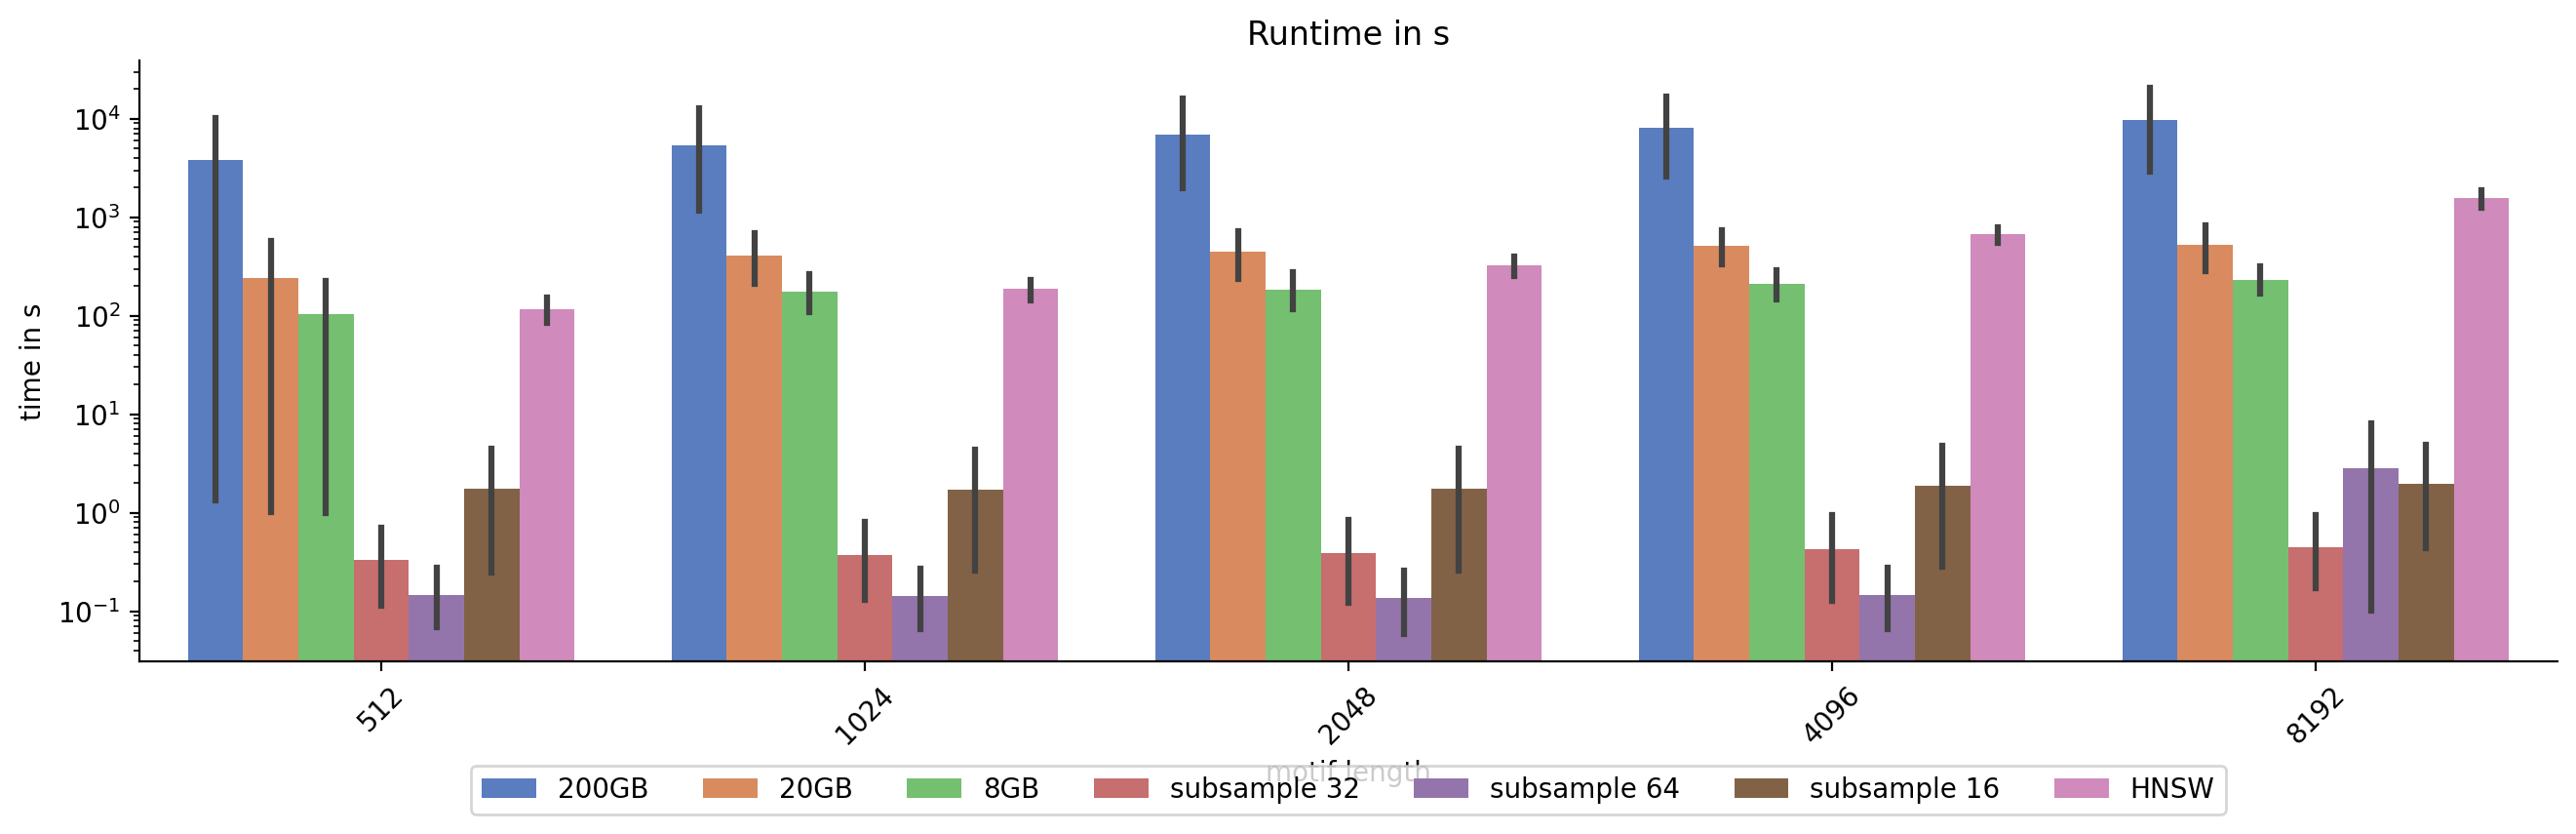

In [16]:
custom_order = ["8GB", "20GB", "200GB", "pynndescent", "subsample 16", "subsample 32", "subsample 64"]

fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(
    y="time in s", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    palette="muted", 
    ax=ax,
    # hue_order=custom_order
)
ax.tick_params(axis='x', rotation=45)

sns.despine()
ax.set_title("Runtime in s")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

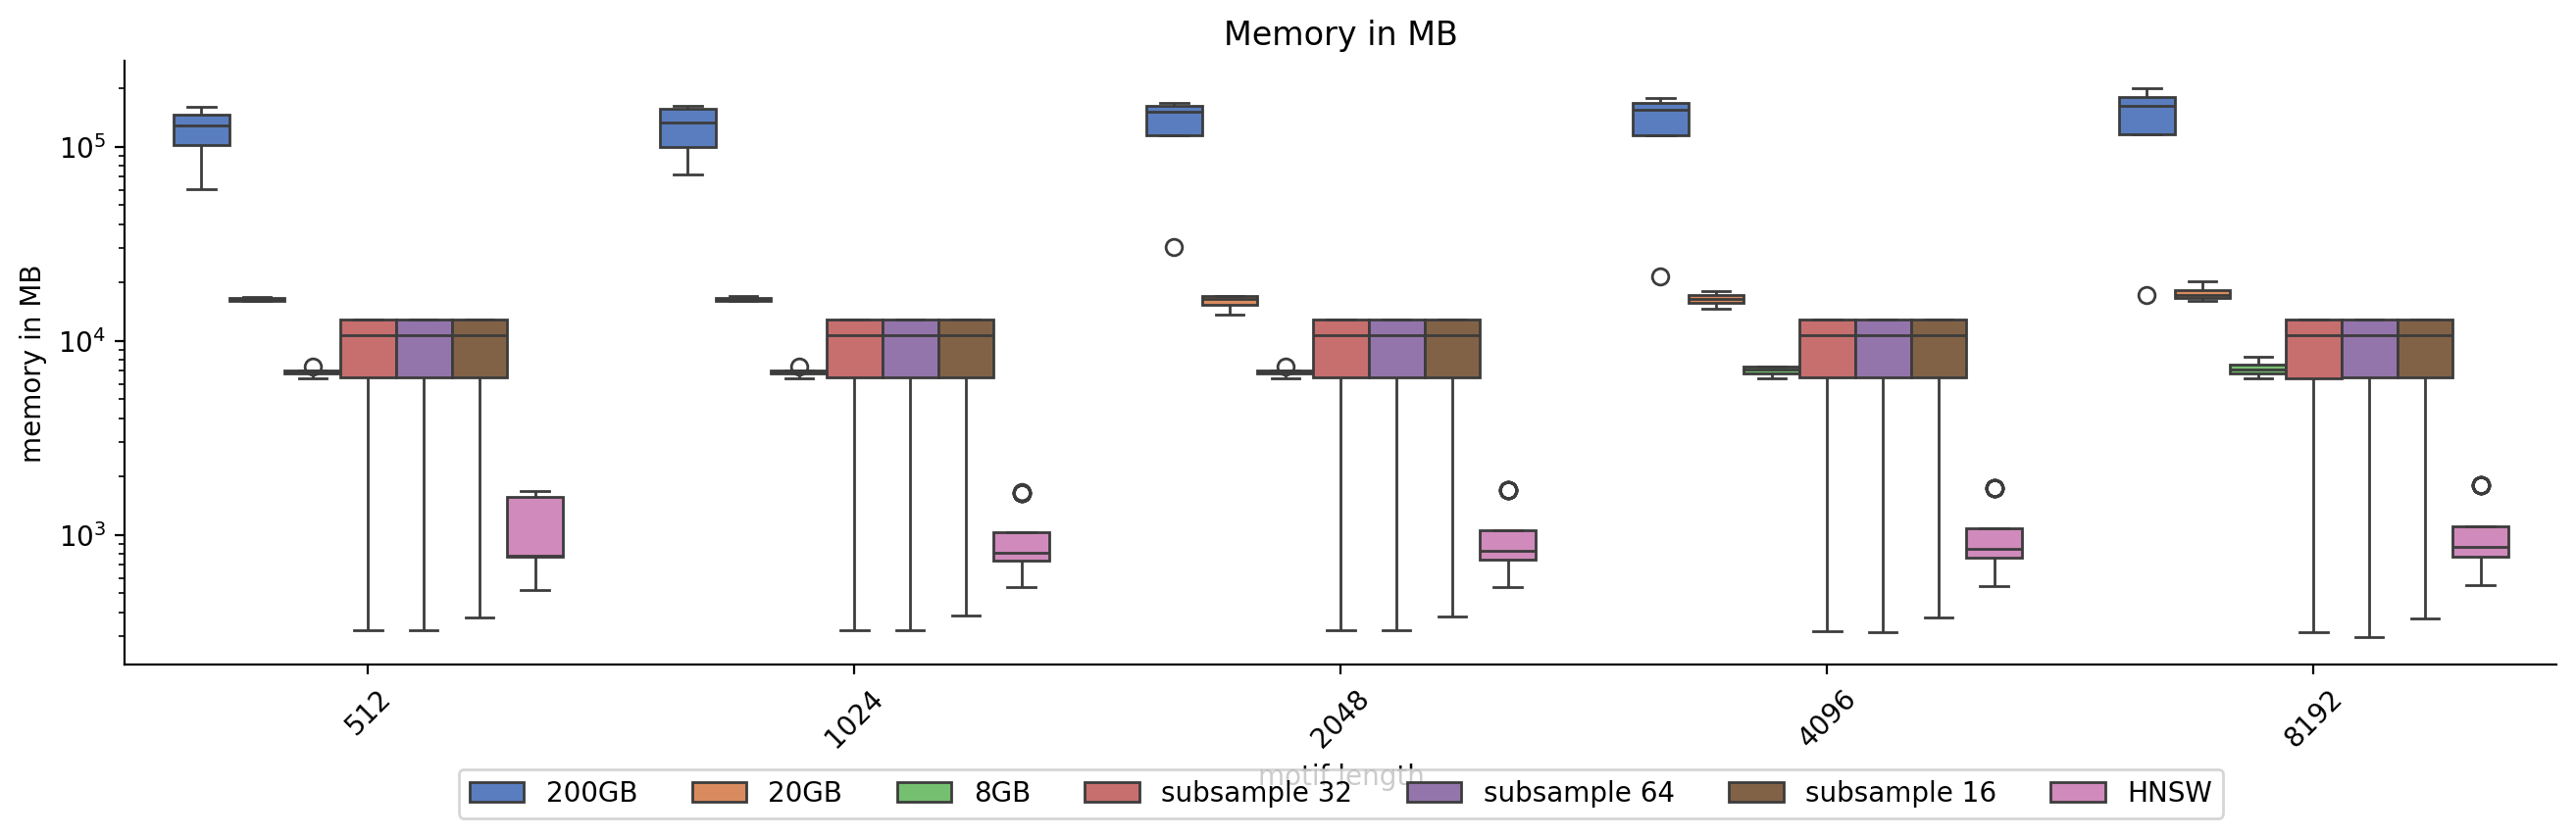

In [13]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(
    y="memory in MB", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    palette="muted", 
    ax=ax,    
    # hue_order=custom_order
)
ax.tick_params(axis='x', rotation=45)

sns.despine()
ax.set_title("Memory in MB")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

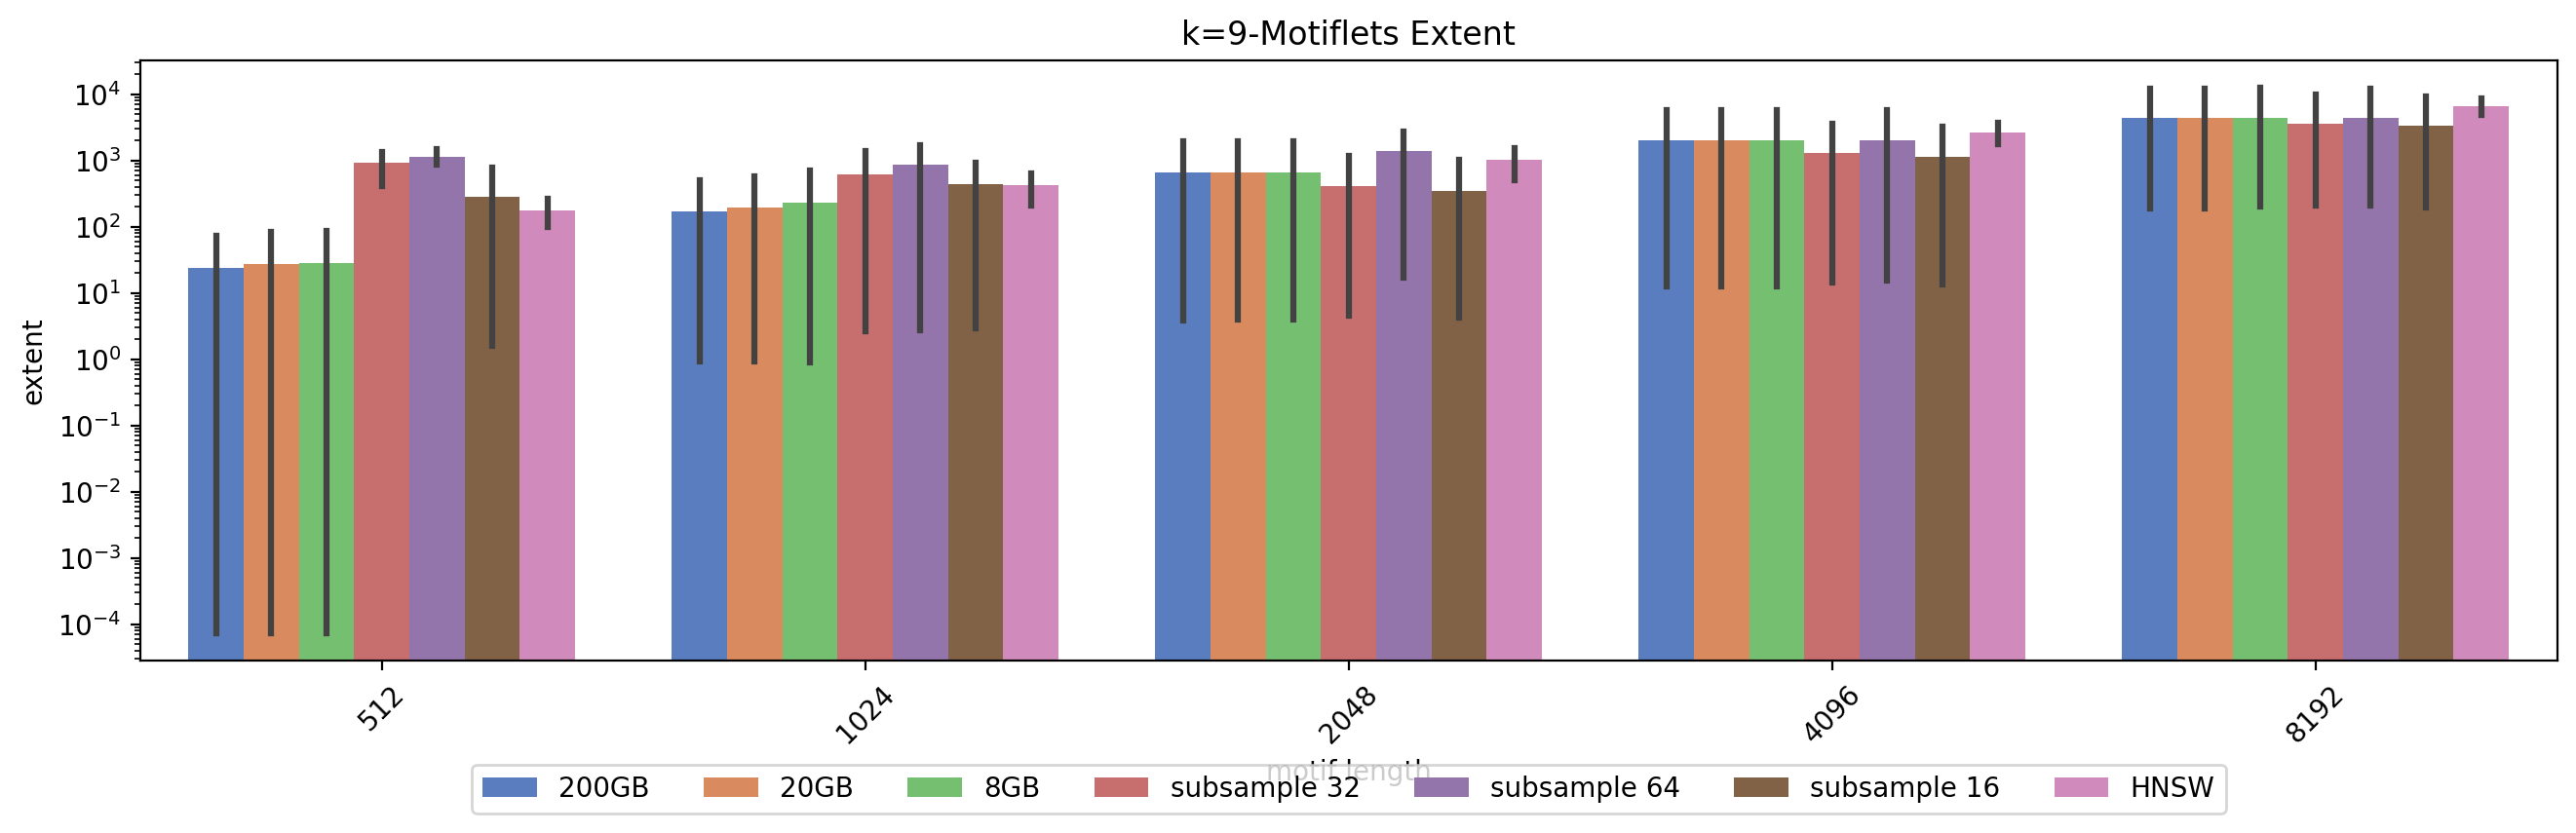

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(
    y="extent", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    palette="muted", 
    ax=ax,
    # hue_order=custom_order
)
ax.tick_params(axis='x', rotation=45)

ax.set_title("k=9-Motiflets Extent")
plt.yscale('log')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()